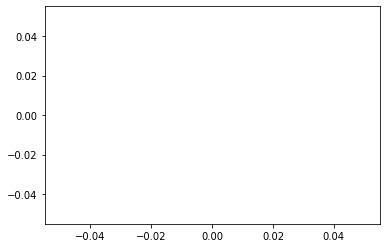

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from IPython.display import display, Markdown, Latex
import pickle

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.plot()

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)


from utils import QuasilinearCE, get_random_prob

In [2]:
prob = QuasilinearCE()

In [3]:
display(Latex(prob.general_setup()))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

{'x': 35.0, 'y': 24.999999999999996, 'xmax': 60.0, 'ymax': 60.0, 'U': 85.0}


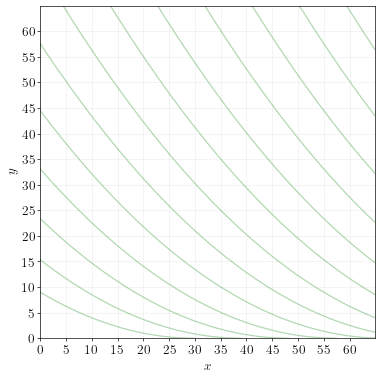

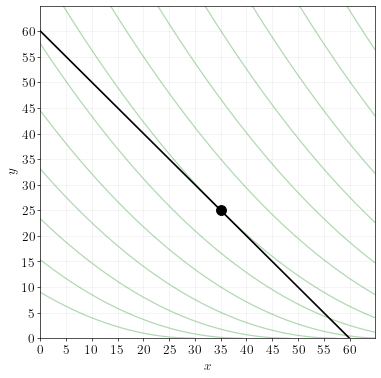

True

In [4]:
display(Latex(prob.setup()))
print(prob.sol)
prob.graph_with_IC(show=True)
prob.graph_with_IC(with_solution=True, show=True)

<IPython.core.display.Latex object>

{'x': 24.999999999999996, 'y': 35.0, 'xmax': 60.0, 'ymax': 60.0, 'U': 85.0}


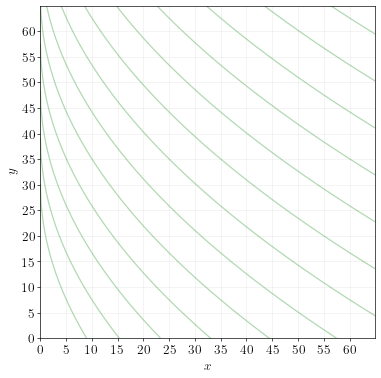

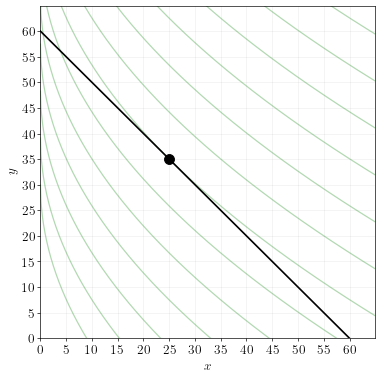

True

In [5]:
params = prob.params
params['numeraire'] = 'y'
prob = QuasilinearCE(params)
display(Latex(prob.setup()))
print(prob.sol)
prob.graph_with_IC(show=True)
prob.graph_with_IC(with_solution=True, show=True)

In [6]:
examples = []
n_found = 0
for xmax_i in np.arange(3,13):
    for ymax_i in np.arange(3,13):
        for gmax in [12, 24, 60, 120, 180, 240, 300]:
            for px in np.arange(1,11):
                I = xmax_i*(gmax/12)*px
                py = (xmax_i/ymax_i)*px
                for d in np.arange(1,5):
                    for n in np.arange(1,d):
                        for a in np.arange(1,2*gmax):
                            params = {'n':n,'d':d,'a':a,'I':I,'px':px,'py':py,'gmax':gmax,'numeraire':'x'}
                            prob = QuasilinearCE(params)
                            if prob.check_solution():
                                n_found+=1
                                examples.append( prob.params | prob.sol )
                                if (n_found%1000==0):
                                    print(f"{n_found} examples found...")
                            params = {'n':n,'d':d,'a':a,'I':I,'px':py,'py':px,'gmax':gmax,'numeraire':'y'}
                            prob = QuasilinearCE(params)
                            if prob.check_solution():
                                n_found+=1
                                examples.append( prob.params | prob.sol )
                                if (n_found%1000==0):
                                    print(f"{n_found} examples found...")
examples = pd.DataFrame.from_dict(examples)
examples = examples.drop_duplicates()
examples.to_csv("QuasilinearCE_examples.csv", index=False, header=True)
print(f"{len(examples)} examples found.")

1000 examples found...
2000 examples found...
3000 examples found...
4000 examples found...
5000 examples found...
6000 examples found...
7000 examples found...
7256 examples found.


<IPython.core.display.Latex object>

{'x': 16.0, 'y': 8.0, 'xmax': 24.0, 'ymax': 24.0, 'U': 40.0}


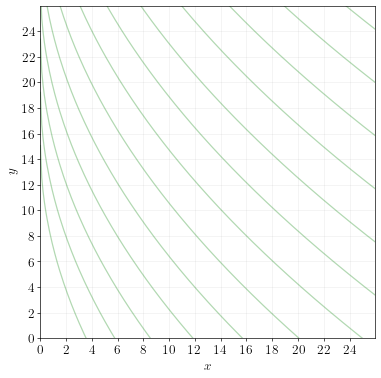

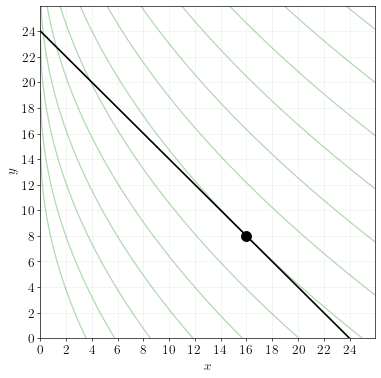

True

In [10]:
prob = get_random_prob(QuasilinearCE, "QuasilinearCE_examples.csv")
display(Latex(prob.setup()))
print(prob.sol)
prob.graph_with_IC(show=True)
prob.graph_with_IC(with_solution=True, show=True)